分类报告：
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       151
           1       0.81      0.89      0.85       202
           2       0.84      0.81      0.82       195
           3       0.67      0.80      0.73       183
           4       0.91      0.90      0.91       205
           5       0.91      0.87      0.89       215
           6       0.88      0.77      0.82       193
           7       0.93      0.95      0.94       196
           8       0.93      0.93      0.93       168
           9       0.98      0.97      0.97       211
          10       0.95      0.97      0.96       198
          11       0.96      0.95      0.96       201
          12       0.92      0.85      0.88       202
          13       0.96      0.94      0.95       194
          14       0.94      0.97      0.96       189
          15       0.89      0.99      0.93       202
          16       0.89      0.95      0.92       188
          17       0.

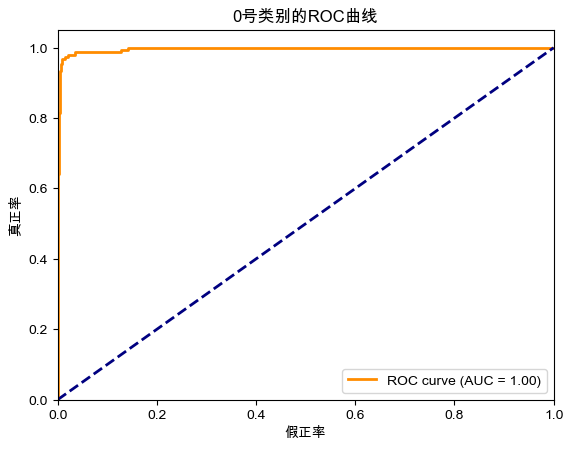

0号类别的AUC值: 0.9963


In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

# 加载20newsgroups数据集
news = fetch_20newsgroups(subset='all')

# 创建TF-IDF向量化器
tfidf = TfidfVectorizer(
    stop_words='english',  # 去除英文停用词
    #max_features=5000,     # 选择最多5000个特征词
    max_df=0.5,           # 在超过50%的文档中出现的词会被过滤
    min_df=10             # 出现次数少于10次的词会被过滤
)

# 对文本数据进行TF-IDF转换
X_tfidf = tfidf.fit_transform(news.data)
y = news.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42
)

# 创建并训练朴素贝叶斯分类器
nb = MultinomialNB(alpha=0.2)
nb.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = nb.predict(X_test)

# 输出分类报告
print("分类报告：")
print(classification_report(y_test, y_pred))

# 输出模型准确率
print(f"模型准确率: {nb.score(X_test, y_test):.4f}")
# 导入ROC曲线所需的库
import matplotlib.pyplot as plt

# 获取第0类的预测概率
y_prob = nb.predict_proba(X_test)[:, 0]

# 创建二分类标签(是否为0类)
y_test_binary = (y_test == 0).astype(int)

# 计算ROC曲线的假正率和真正率
fpr, tpr, thresholds = roc_curve(y_test_binary, y_prob)

# 计算AUC值
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
# 设置中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # Mac系统使用Arial Unicode MS
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('假正率')
plt.ylabel('真正率')
plt.title('0号类别的ROC曲线')
plt.legend(loc="lower right")
plt.show()

print(f"0号类别的AUC值: {roc_auc:.4f}")
